In [1]:
pip install fastai --upgrade 

     |████████████████████████████████| 189 kB 8.4 MB/s 
     |████████████████████████████████| 56 kB 5.9 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [3]:
from google.colab import drive, files
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
! unzip /content/gdrive/MyDrive/Plant_Check.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: Plant/fb4ba433-fd23-45ea-8480-4a8f8e5844a6___UF.Citrus_HLB_Lab 9700.JPG  
  inflating: Plant/fb4ce6df-613b-4d52-8e11-28dfa448a5e1___GH_HL Leaf 483.JPG  
  inflating: Plant/fb4d0983-9df9-40be-8b1c-bbd5b9aa3620___Com.G_SpM_FL 1770.JPG  
  inflating: Plant/fb4f1fd5-8f91-438b-9c7a-43d0aec52c10___RS_HL 3857.JPG  
  inflating: Plant/fb502abf-e2a8-4872-ba58-863141be5984___CREC_HLB 6552.JPG  
  inflating: Plant/fb510953-df8a-47df-985c-abe10f6c4266___FAM_B.Msls 1325.JPG  
  inflating: Plant/fb510953-df8a-47df-985c-abe10f6c4266___FAM_B.Msls 1325_flipLR.JPG  
  inflating: Plant/fb51107e42f4eac8.jpg  
  inflating: Plant/fb5116a2-272b-49af-9c27-9b117376a306___RS_HL 8021.JPG  
  inflating: Plant/fb5116a2-272b-49af-9c27-9b117376a306___RS_HL 8021_flipTB.JPG  
  inflating: Plant/fb51d62c-600b-4f90-a5d8-31d1050466b8___YLCV_GCREC 2781.JPG  
  inflating: Plant/fb5240fd-815f-44f1-ab63-d3f5ee0c3fb3___Rutg._Bact.S 1144.JPG  
  inflating: Plant/fb5551c8-d45c-4c

In [5]:
path = '/content/Plant_OR_NOT'

In [6]:
fns=get_image_files(path)
fns

(#133556) [Path('/content/Plant_OR_NOT/NotPlant/tattoo_23_390.jpg'),Path('/content/Plant_OR_NOT/NotPlant/painting_9_20513.jpg'),Path('/content/Plant_OR_NOT/NotPlant/tattoo_6_13000.jpg'),Path('/content/Plant_OR_NOT/NotPlant/cartoon_20_11808.jpg'),Path('/content/Plant_OR_NOT/NotPlant/sketch_4_5281.jpg'),Path('/content/Plant_OR_NOT/NotPlant/graphic_11_3144.jpg'),Path('/content/Plant_OR_NOT/NotPlant/misc_132_28235.jpg'),Path('/content/Plant_OR_NOT/NotPlant/graphic_4_22189.jpg'),Path('/content/Plant_OR_NOT/NotPlant/tattoo_0_24448.jpg'),Path('/content/Plant_OR_NOT/NotPlant/misc_43_26840.jpg')...]

In [7]:
leaf=DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=(0.2),seed=42),
               get_y=parent_label,item_tfms=Resize(256))

In [8]:
leaf = leaf.new(item_tfms=Resize(256), batch_tfms=aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=40.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0))

In [9]:
dls=leaf.dataloaders(path,num_workers = 0)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [10]:
learner=cnn_learner(dls,resnet18,metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.010449,0.012849,0.996893,0.003107,13:49


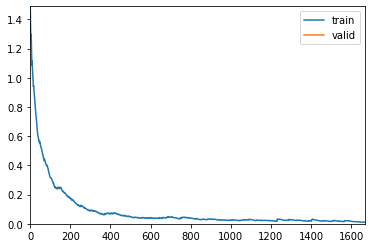

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.010365,0.003488,0.999102,0.000899,14:39


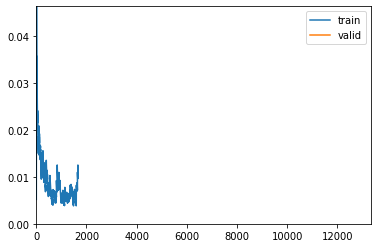

KeyboardInterrupt: ignored

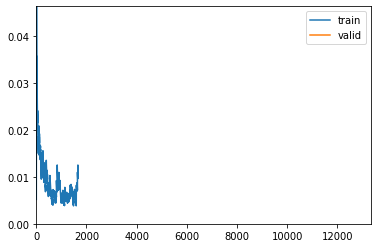

In [11]:
learner.fine_tune(8, 3e-3, wd=0.5,cbs=[ShowGraphCallback()])

In [110]:
import pickle
from google.colab import files
learner.export('plant_notplant_resnet18.pkl')
files.download('plant_notplant_resnet18.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
files.upload()

Saving picture28.jpg to picture28.jpg


{'picture28.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x00\x9d\x01V\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16

In [204]:
from PIL import Image
import os

img = Image.open('/content/picture28.jpg')

#os.remove('test.jpg')
img_resize = img.resize((256, 256))
img_resize.save('test.jpg')

In [205]:
learn_test = load_learner('/content/plant_notplant_resnet18.pkl')
learn_test.predict("/content/test.jpg")

('Plant', TensorBase(1), TensorBase([1.4710e-04, 9.9985e-01]))